In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as st
from pprint import pprint
import requests
import numpy as np

In [18]:
# Read the CSV file into the valuations DataFrame
file_path = "resources/valuations_by_zip.csv"
valuations = pd.read_csv(file_path)

# Now you have the DataFrame valuations with data from "valuations_by_zip.csv"
valuations.head(5)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1/31/2000,...,9/30/2022,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023
0,61148,0,8701,zip,NJ,NJ,Lakewood,"New York-Newark-Jersey City, NY-NJ-PA",Ocean County,130495.05400,...,522911.9386,525760.9170,529585.5433,532686.3869,535392.3916,537659.7100,541718.3694,547034.2568,552740.3348,557699.9148
1,91982,1,77494,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,223783.26330,...,489818.3844,488119.8233,486700.7429,484703.5506,482475.3787,481336.2020,482130.0237,484303.7853,486757.3268,489401.7676
2,91940,2,77449,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Harris County,113663.91730,...,286215.8130,285608.5459,284607.9114,283023.8272,281199.6336,279635.9665,278828.7963,278477.9276,278667.2520,279406.7706
3,62080,3,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,98291.00869,...,436429.3082,433923.3496,433047.6669,431340.1718,431285.7080,432070.7890,434946.1341,436790.9086,440642.7600,447181.4880
4,92593,4,78660,zip,TX,TX,Pflugerville,"Austin-Round Rock-Georgetown, TX",Travis County,184599.88630,...,461233.3543,454831.3355,447984.4616,440769.6379,434524.0617,429565.2938,426007.1345,422638.1156,420350.3307,419499.3968


In [19]:

def get_zip_code_data(zip_codes):
    base_url = "https://zip-code-master.p.rapidapi.com/detail/"

    headers = {
        "X-RapidAPI-Key": "558adedba3msh9b5c4fc48b9c426p17c2a9jsnae5efc3a2061",
        "X-RapidAPI-Host": "zip-code-master.p.rapidapi.com"
    }

    for zip_code in zip_codes:
        url = base_url + str(zip_code)
        response = requests.get(url, headers=headers)
        data = response.json()
        print(f"Data for Zip Code {zip_code}:")
        print(data)
        print()

# List of zip codes to fetch data for
zip_codes = [78741, 78729, 78748, 78724, 78733]

# Call the function to get data for the specified zip codes
# get_zip_code_data(zip_codes)

In [20]:
url = "https://zip-code-master.p.rapidapi.com/detail/78741"

headers = {
    "X-RapidAPI-Key": "558adedba3msh9b5c4fc48b9c426p17c2a9jsnae5efc3a2061",
    "X-RapidAPI-Host": "zip-code-master.p.rapidapi.com"
}

response = requests.get(url, headers=headers)
data_78741 = response.json()

# Extract the subcategories under the "summary" header
summary_data = data_78741.get("summary", {})
ethnicity_data = data_78741.get("ethnicity", {})
education_data = data_78741.get("education", {})

# Filter the specific categories for zipcode 78741
filtered_data_78741 = {
    "ZipCode": summary_data.get("zip_code"),
    "Population": summary_data.get("population"),
    "MedianHouseholdIncome": summary_data.get("median_household_income"),
}

# Convert the 'ethnicity_data' and 'education_data' dictionaries to DataFrames
ethnicity_df = pd.DataFrame(ethnicity_data.items(), columns=["Ethnicity", "Value"])
education_df = pd.DataFrame(education_data.items(), columns=["Education", "Value"])

# Concatenate the 'ethnicity_df' and 'education_df' vertically to create the final DataFrame
zip_78741 = pd.concat([pd.DataFrame([filtered_data_78741]), ethnicity_df, education_df], axis=1)

# Now you have the DataFrame zip_78741 with filtered data for zipcode 78741
print(zip_78741)

# Save the DataFrame to a CSV file in the "resources" folder
file_name = "resources/zip_78741.csv"
zip_78741.to_csv(file_name, index=False)

  ZipCode Population MedianHouseholdIncome               Ethnicity  \
0   78741     46,147               $54,422                   White   
1     NaN        NaN                   NaN                   Black   
2     NaN        NaN                   NaN                Hispanic   
3     NaN        NaN                   NaN                   Asian   
4     NaN        NaN                   NaN         Native American   
5     NaN        NaN                   NaN  Hawaiian/Pac. Islander   
6     NaN        NaN                   NaN                     NaN   
7     NaN        NaN                   NaN                     NaN   
8     NaN        NaN                   NaN                     NaN   
9     NaN        NaN                   NaN                     NaN   

           Value                    Education         Value  
0  27,297,46.64%  Less Than 1 Year of College   1,054,6.22%  
1    5,124,8.75%              Bachelor Degree  3,655,21.58%  
2  23,184,39.61%          High School Diplo

In [21]:
url = "https://zip-code-master.p.rapidapi.com/detail/78729"

headers = {
    "X-RapidAPI-Key": "558adedba3msh9b5c4fc48b9c426p17c2a9jsnae5efc3a2061",
    "X-RapidAPI-Host": "zip-code-master.p.rapidapi.com"
}

response = requests.get(url, headers=headers)
data_78729 = response.json()

# Extract the subcategories under the "summary" header
summary_data1 = data_78729.get("summary", {})
ethnicity_data1 = data_78729.get("ethnicity", {})
education_data1 = data_78729.get("education", {})

# Filter the specific categories for zipcode 78729
filtered_data_78729 = {
    "ZipCode": summary_data1.get("zip_code"),
    "Population": summary_data1.get("population"),
    "MedianHouseholdIncome": summary_data1.get("median_household_income"),
}

# Convert the 'ethnicity_data' and 'education_data' dictionaries to DataFrames
ethnicity_df1 = pd.DataFrame(ethnicity_data1.items(), columns=["Ethnicity", "Value"])
education_df1 = pd.DataFrame(education_data1.items(), columns=["Education", "Value"])

# Concatenate the 'ethnicity_df' and 'education_df' vertically to create the final DataFrame
zip_78729 = pd.concat([pd.DataFrame([filtered_data_78729]), ethnicity_df1, education_df1], axis=1)

# Now you have the DataFrame zip_78729 with filtered data for zipcode 78729
print(zip_78729)

# Save the DataFrame to a CSV file in the "resources" folder
file_name = "resources/zip_78729.csv"
zip_78729.to_csv(file_name, index=False)

  ZipCode Population MedianHouseholdIncome               Ethnicity  \
0   78729     30,907               $76,615                   White   
1     NaN        NaN                   NaN                   Black   
2     NaN        NaN                   NaN                Hispanic   
3     NaN        NaN                   NaN                   Asian   
4     NaN        NaN                   NaN         Native American   
5     NaN        NaN                   NaN  Hawaiian/Pac. Islander   
6     NaN        NaN                   NaN                     NaN   
7     NaN        NaN                   NaN                     NaN   
8     NaN        NaN                   NaN                     NaN   
9     NaN        NaN                   NaN                     NaN   

           Value                    Education         Value  
0  21,547,64.04%  Less Than 1 Year of College   1,399,7.73%  
1    1,896,5.63%              Bachelor Degree  6,122,33.81%  
2   6,183,18.38%          High School Diplo

In [22]:
url = "https://zip-code-master.p.rapidapi.com/detail/78748"

headers = {
    "X-RapidAPI-Key": "558adedba3msh9b5c4fc48b9c426p17c2a9jsnae5efc3a2061",
    "X-RapidAPI-Host": "zip-code-master.p.rapidapi.com"
}

response = requests.get(url, headers=headers)
data_78748 = response.json()

# Extract the subcategories under the "summary" header
summary_data2 = data_78748.get("summary", {})
ethnicity_data2 = data_78748.get("ethnicity", {})
education_data2 = data_78748.get("education", {})

# Filter the specific categories for zipcode 78748
filtered_data_78748 = {
    "ZipCode": summary_data2.get("zip_code"),
    "Population": summary_data2.get("population"),
    "MedianHouseholdIncome": summary_data2.get("median_household_income"),
}

# Convert the 'ethnicity_data' and 'education_data' dictionaries to DataFrames
ethnicity_df2 = pd.DataFrame(ethnicity_data2.items(), columns=["Ethnicity", "Value"])
education_df2 = pd.DataFrame(education_data2.items(), columns=["Education", "Value"])

# Concatenate the 'ethnicity_df' and 'education_df' vertically to create the final DataFrame
zip_78748 = pd.concat([pd.DataFrame([filtered_data_78748]), ethnicity_df2, education_df2], axis=1)

# Now you have the DataFrame zip_78748 with filtered data for zipcode 78748
print(zip_78748)

# Save the DataFrame to a CSV file in the "resources" folder
file_name = "resources/zip_78748.csv"
zip_78748.to_csv(file_name, index=False)

  ZipCode Population MedianHouseholdIncome               Ethnicity  \
0   78748     53,501               $89,480                   White   
1     NaN        NaN                   NaN                   Black   
2     NaN        NaN                   NaN                Hispanic   
3     NaN        NaN                   NaN                   Asian   
4     NaN        NaN                   NaN         Native American   
5     NaN        NaN                   NaN  Hawaiian/Pac. Islander   
6     NaN        NaN                   NaN                     NaN   
7     NaN        NaN                   NaN                     NaN   
8     NaN        NaN                   NaN                     NaN   
9     NaN        NaN                   NaN                     NaN   

           Value                    Education         Value  
0  40,507,61.39%  Less Than 1 Year of College   1,802,7.12%  
1    3,276,4.96%              Bachelor Degree  7,765,30.66%  
2  19,473,29.51%          High School Diplo

In [23]:
url = "https://zip-code-master.p.rapidapi.com/detail/78724"

headers = {
    "X-RapidAPI-Key": "558adedba3msh9b5c4fc48b9c426p17c2a9jsnae5efc3a2061",
    "X-RapidAPI-Host": "zip-code-master.p.rapidapi.com"
}

response = requests.get(url, headers=headers)
data_78724 = response.json()

# Extract the subcategories under the "summary" header
summary_data3 = data_78724.get("summary", {})
ethnicity_data3 = data_78724.get("ethnicity", {})
education_data3 = data_78724.get("education", {})

# Filter the specific categories for zipcode 78724
filtered_data_78724 = {
    "ZipCode": summary_data3.get("zip_code"),
    "Population": summary_data3.get("population"),
    "MedianHouseholdIncome": summary_data3.get("median_household_income"),
}

# Convert the 'ethnicity_data' and 'education_data' dictionaries to DataFrames
ethnicity_df3 = pd.DataFrame(ethnicity_data3.items(), columns=["Ethnicity", "Value"])
education_df3 = pd.DataFrame(education_data3.items(), columns=["Education", "Value"])

# Concatenate the 'ethnicity_df' and 'education_df' vertically to create the final DataFrame
zip_78724 = pd.concat([pd.DataFrame([filtered_data_78724]), ethnicity_df3, education_df3], axis=1)

# Now you have the DataFrame zip_78724 with filtered data for zipcode 78724
print(zip_78724)

# Save the DataFrame to a CSV file in the "resources" folder
file_name = "resources/zip_78724.csv"
zip_78724.to_csv(file_name, index=False)

  ZipCode Population MedianHouseholdIncome               Ethnicity  \
0   78724     25,936               $58,631                   White   
1     NaN        NaN                   NaN                   Black   
2     NaN        NaN                   NaN                Hispanic   
3     NaN        NaN                   NaN                   Asian   
4     NaN        NaN                   NaN         Native American   
5     NaN        NaN                   NaN  Hawaiian/Pac. Islander   
6     NaN        NaN                   NaN                     NaN   
7     NaN        NaN                   NaN                     NaN   
8     NaN        NaN                   NaN                     NaN   
9     NaN        NaN                   NaN                     NaN   

           Value                    Education         Value  
0   7,706,25.12%  Less Than 1 Year of College    748,10.41%  
1   5,717,18.63%              Bachelor Degree    828,11.52%  
2  16,746,54.58%          High School Diplo

In [24]:
url = "https://zip-code-master.p.rapidapi.com/detail/78733"

headers = {
    "X-RapidAPI-Key": "558adedba3msh9b5c4fc48b9c426p17c2a9jsnae5efc3a2061",
    "X-RapidAPI-Host": "zip-code-master.p.rapidapi.com"
}

response = requests.get(url, headers=headers)
data_78733 = response.json()

# Extract the subcategories under the "summary" header
summary_data4 = data_78733.get("summary", {})
ethnicity_data4 = data_78733.get("ethnicity", {})
education_data4 = data_78733.get("education", {})

# Filter the specific categories for zipcode 78733
filtered_data_78733 = {
    "ZipCode": summary_data4.get("zip_code"),
    "Population": summary_data4.get("population"),
    "MedianHouseholdIncome": summary_data4.get("median_household_income"),
}

# Convert the 'ethnicity_data' and 'education_data' dictionaries to DataFrames
ethnicity_df4 = pd.DataFrame(ethnicity_data4.items(), columns=["Ethnicity", "Value"])
education_df4 = pd.DataFrame(education_data4.items(), columns=["Education", "Value"])

# Concatenate the 'ethnicity_df' and 'education_df' vertically to create the final DataFrame
zip_78733 = pd.concat([pd.DataFrame([filtered_data_78733]), ethnicity_df4, education_df4], axis=1)
# Now you have the DataFrame zip_78733 with filtered data for zipcode 78733
print(zip_78733)

# Save the DataFrame to a CSV file in the "resources" folder
file_name = "resources/zip_78733.csv"
zip_78733.to_csv(file_name, index=False)

  ZipCode Population MedianHouseholdIncome               Ethnicity  \
0   78733      9,500              $187,778                   White   
1     NaN        NaN                   NaN                   Black   
2     NaN        NaN                   NaN                Hispanic   
3     NaN        NaN                   NaN                   Asian   
4     NaN        NaN                   NaN         Native American   
5     NaN        NaN                   NaN  Hawaiian/Pac. Islander   
6     NaN        NaN                   NaN                     NaN   
7     NaN        NaN                   NaN                     NaN   
8     NaN        NaN                   NaN                     NaN   
9     NaN        NaN                   NaN                     NaN   

          Value                    Education         Value  
0  6,951,72.92%  Less Than 1 Year of College     112,1.89%  
1     100,1.05%              Bachelor Degree  2,034,34.31%  
2     914,9.59%          High School Diploma  

In [25]:
# Create new datafram filtered to only contain rows for our zip codes list
filtered_valuations = valuations[valuations["RegionName"].isin(zip_codes)]

filtered_valuations

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1/31/2000,...,9/30/2022,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023
1033,92657,1042,78748,zip,TX,TX,Austin,"Austin-Round Rock-Georgetown, TX",Travis County,184681.8549,...,5.008487e+05,4.955328e+05,4.898461e+05,4.834550e+05,4.772545e+05,4.725911e+05,4.698997e+05,4.684060e+05,4.677578e+05,4.681323e+05
1249,92651,1262,78741,zip,TX,TX,Austin,"Austin-Round Rock-Georgetown, TX",Travis County,135607.9764,...,4.978170e+05,4.917514e+05,4.864464e+05,4.795754e+05,4.729263e+05,4.672883e+05,4.641011e+05,4.612265e+05,4.586732e+05,4.569360e+05
3596,92640,3645,78729,zip,TX,TX,Austin,"Austin-Round Rock-Georgetown, TX",Williamson County,186837.1536,...,5.201671e+05,5.141451e+05,5.079558e+05,5.009961e+05,4.958640e+05,4.927890e+05,4.921382e+05,4.910510e+05,4.899398e+05,4.891218e+05
4529,92635,4590,78724,zip,TX,TX,Austin,"Austin-Round Rock-Georgetown, TX",Travis County,104119.9765,...,4.079590e+05,4.015914e+05,3.957094e+05,3.887497e+05,3.833286e+05,3.791897e+05,3.770446e+05,3.744998e+05,3.725071e+05,3.715233e+05
8920,92644,9036,78733,zip,TX,TX,Austin,"Austin-Round Rock-Georgetown, TX",Travis County,430697.2680,...,1.284460e+06,1.261612e+06,1.244879e+06,1.231585e+06,1.219868e+06,1.206222e+06,1.197661e+06,1.191675e+06,1.190277e+06,1.192957e+06


In [26]:
# Filter the dataset to include only the coulumns labels and year required
needed_columns = ["RegionName", "State", "City", "1/31/2022", "2/28/2022", "3/31/2022", "4/30/2022",
                   "5/31/2022", "6/30/2022", "7/31/2022", "8/31/2022", "9/30/2022", "10/31/2022",
                   "11/30/2022", "12/31/2022"]

# Filter the zip codes dataframe to include only the needed columns
zip_2022_valuations = filtered_valuations[needed_columns]

zip_2022_valuations

,RegionName,State,City,1/31/2022,2/28/2022,3/31/2022,4/30/2022,5/31/2022,6/30/2022,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022
1033,78748,TX,Austin,4.652866e+05,4.733472e+05,4.833207e+05,4.934197e+05,5.027540e+05,5.086169e+05,5.093862e+05,5.062323e+05,5.008487e+05,4.955328e+05,4.898461e+05,4.834550e+05
1249,78741,TX,Austin,4.571036e+05,4.658295e+05,4.769514e+05,4.887252e+05,4.995065e+05,5.062650e+05,5.079121e+05,5.041299e+05,4.978170e+05,4.917514e+05,4.864464e+05,4.795754e+05
3596,78729,TX,Austin,4.876452e+05,4.971723e+05,5.085553e+05,5.192117e+05,5.279416e+05,5.328750e+05,5.319058e+05,5.270526e+05,5.201671e+05,5.141451e+05,5.079558e+05,5.009961e+05
4529,78724,TX,Austin,3.716417e+05,3.818066e+05,3.932160e+05,4.036223e+05,4.113314e+05,4.165404e+05,4.173921e+05,4.141002e+05,4.079590e+05,4.015914e+05,3.957094e+05,3.887497e+05
8920,78733,TX,Austin,1.178402e+06,1.207223e+06,1.245478e+06,1.283010e+06,1.313326e+06,1.326954e+06,1.324098e+06,1.308751e+06,1.284460e+06,1.261612e+06,1.244879e+06,1.231585e+06


In [27]:
# Calculate the mean for all of 2022 in a new column
# zip_2022_valuations["2022 Avg. Value"] = zip_2022_valuations.iloc[:, 3:15].mean(axis=1)
zip_2022_valuations["2022 Avg. Value"] = zip_2022_valuations.loc[:, '1/31/2022':'12/31/2022'].mean(axis=1)


# Format the new column
zip_2022_valuations["2022 Avg. Value"] = zip_2022_valuations["2022 Avg. Value"].map('${:,.2f}'.format)

zip_2022_valuations.set_index('RegionName')

zip_2022_valuations

/var/folders/nc/_jkq0tbd5vn7khjlslsclkrw0000gn/T/ipykernel_31884/2957943838.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zip_2022_valuations["2022 Avg. Value"] = zip_2022_valuations.loc[:, '1/31/2022':'12/31/2022'].mean(axis=1)
/var/folders/nc/_jkq0tbd5vn7khjlslsclkrw0000gn/T/ipykernel_31884/2957943838.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zip_2022_valuations["2022 Avg. Value"] = zip_2022_valuations["2022 Avg. Value"].map('${:,.2f}'.format)


,RegionName,State,City,1/31/2022,2/28/2022,3/31/2022,4/30/2022,5/31/2022,6/30/2022,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022,2022 Avg. Value
1033,78748,TX,Austin,4.652866e+05,4.733472e+05,4.833207e+05,4.934197e+05,5.027540e+05,5.086169e+05,5.093862e+05,5.062323e+05,5.008487e+05,4.955328e+05,4.898461e+05,4.834550e+05,"$492,670.52"
1249,78741,TX,Austin,4.571036e+05,4.658295e+05,4.769514e+05,4.887252e+05,4.995065e+05,5.062650e+05,5.079121e+05,5.041299e+05,4.978170e+05,4.917514e+05,4.864464e+05,4.795754e+05,"$488,501.11"
3596,78729,TX,Austin,4.876452e+05,4.971723e+05,5.085553e+05,5.192117e+05,5.279416e+05,5.328750e+05,5.319058e+05,5.270526e+05,5.201671e+05,5.141451e+05,5.079558e+05,5.009961e+05,"$514,635.31"
4529,78724,TX,Austin,3.716417e+05,3.818066e+05,3.932160e+05,4.036223e+05,4.113314e+05,4.165404e+05,4.173921e+05,4.141002e+05,4.079590e+05,4.015914e+05,3.957094e+05,3.887497e+05,"$400,305.02"
8920,78733,TX,Austin,1.178402e+06,1.207223e+06,1.245478e+06,1.283010e+06,1.313326e+06,1.326954e+06,1.324098e+06,1.308751e+06,1.284460e+06,1.261612e+06,1.244879e+06,1.231585e+06,"$1,267,481.61"


In [28]:
# # Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# house_value_per_zip = zip_2022_valuations.groupby("2022 Avg. Value`")["Mouse ID"]


# # Get unique drug regimens and their respective counts
# house_value_per_zip_78724 = zip_2022_valuations.index
# count_per_regimen = mouse_count_per_regimen.values

# # Create the x_axis using the unique drug regimens
# x_axis = np.arange(len(zip_2022_valuations))
# y_axis = np.

# plt.xlabel("Drug Regimen")
# plt.ylabel("# of Observed Mouse Timepoints")

# plt.bar(x_axis, count_per_regimen, color='royalblue', alpha=0.9, align="center")
# plt.xticks(tick_locations, unique_drug_regimens, rotation="vertical")

# plt.show()

#region_name = zip_2022_valuations["RegionName"].values
#zip_2022_valuations["RegionName"] = zip_2022_valuations["RegionName"].astype(str)

# x_axis = zip_2022_valuations["RegionName"]
# y_axis = zip_2022_valuations["2022 Avg. Value"]

#avg_value = zip_2022_valuations["2022 Avg. Value"].str.replace("$", "")


## Median Income
Average Income based on Zip Code

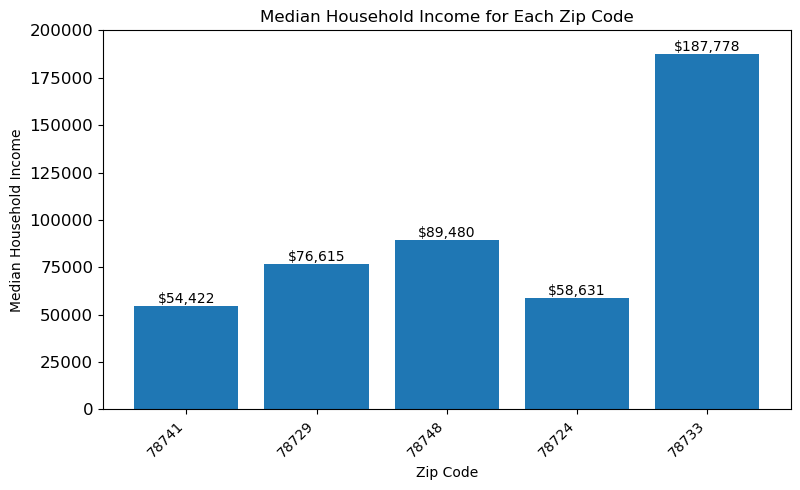

In [29]:
# Extract median household income for each zip code
median_income_78741 = zip_78741["MedianHouseholdIncome"].values[0]
median_income_78729 = zip_78729["MedianHouseholdIncome"].values[0]
median_income_78748 = zip_78748["MedianHouseholdIncome"].values[0]
median_income_78724 = zip_78724["MedianHouseholdIncome"].values[0]
median_income_78733 = zip_78733["MedianHouseholdIncome"].values[0]
# Create a list of median household income values
median_household_incomes = [median_income_78741, median_income_78729, median_income_78748, median_income_78724, median_income_78733]
# Convert data to integers
median_household_incomes = [int(income.replace("$", "").replace(",", "")) for income in median_household_incomes]
# Create a list of zip codes
zip_codes2 = ['78741', '78729', '78748', '78724', '78733']
# Create a bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(zip_codes2, median_household_incomes)
plt.xlabel("Zip Code")
plt.ylabel("Median Household Income")
plt.title("Median Household Income for Each Zip Code")
plt.ylim(0, 200000)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.yticks(range(0, 200001, 25000), fontsize=12)
# Add text labels to the top of each bar
for bar, income in zip(bars, median_household_incomes):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"${income:,}", ha="center", va="bottom", fontsize=10)
plt.show()

In [30]:
avg_value

NameError: name 'avg_value' is not defined

In [31]:
#school_types = school_data_complete.groupby(['school_name']) ['type'].first()
avg_val_list= zip_2022_valuations.groupby(["RegionName"])["2022 Avg. Value"].first()
avg_val_list

RegionName
78724      $400,305.02
78729      $514,635.31
78733    $1,267,481.61
78741      $488,501.11
78748      $492,670.52
Name: 2022 Avg. Value, dtype: object

## Valuation Per Zip

This section compares the changes in value throughout the year 2022

In [32]:

#drop City and State Columns
updated_2022_values = zip_2022_valuations.drop(['State', 'City'], axis=1)

#Set RegionName as Index
updated_2022_values = updated_2022_values.set_index("RegionName")
updated_2022_values


,1/31/2022,2/28/2022,3/31/2022,4/30/2022,5/31/2022,6/30/2022,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022,2022 Avg. Value
RegionName,,,,,,,,,,,,,
78748,4.652866e+05,4.733472e+05,4.833207e+05,4.934197e+05,5.027540e+05,5.086169e+05,5.093862e+05,5.062323e+05,5.008487e+05,4.955328e+05,4.898461e+05,4.834550e+05,"$492,670.52"
78741,4.571036e+05,4.658295e+05,4.769514e+05,4.887252e+05,4.995065e+05,5.062650e+05,5.079121e+05,5.041299e+05,4.978170e+05,4.917514e+05,4.864464e+05,4.795754e+05,"$488,501.11"
78729,4.876452e+05,4.971723e+05,5.085553e+05,5.192117e+05,5.279416e+05,5.328750e+05,5.319058e+05,5.270526e+05,5.201671e+05,5.141451e+05,5.079558e+05,5.009961e+05,"$514,635.31"
78724,3.716417e+05,3.818066e+05,3.932160e+05,4.036223e+05,4.113314e+05,4.165404e+05,4.173921e+05,4.141002e+05,4.079590e+05,4.015914e+05,3.957094e+05,3.887497e+05,"$400,305.02"
78733,1.178402e+06,1.207223e+06,1.245478e+06,1.283010e+06,1.313326e+06,1.326954e+06,1.324098e+06,1.308751e+06,1.284460e+06,1.261612e+06,1.244879e+06,1.231585e+06,"$1,267,481.61"


In [33]:
# Create a list of monthly household income values
monthly_household_incomes = updated_2022_values.loc[:, '1/31/2022':'12/31/2022'].values

#convert to integers
monthly_household_incomes= monthly_household_incomes.astype(int)
monthly_household_incomes

array([[ 465286,  473347,  483320,  493419,  502753,  508616,  509386,
         506232,  500848,  495532,  489846,  483455],
       [ 457103,  465829,  476951,  488725,  499506,  506264,  507912,
         504129,  497817,  491751,  486446,  479575],
       [ 487645,  497172,  508555,  519211,  527941,  532875,  531905,
         527052,  520167,  514145,  507955,  500996],
       [ 371641,  381806,  393216,  403622,  411331,  416540,  417392,
         414100,  407958,  401591,  395709,  388749],
       [1178402, 1207222, 1245478, 1283010, 1313325, 1326954, 1324097,
        1308750, 1284460, 1261612, 1244879, 1231585]])

In [34]:
# Create a list of months for x-axis
datasets = np.monthly_household_incomes.T
x = np.array([np.arange(12)]*5).T

lines = plt.step(x, datasets)
months = ['1/31/2022', '2/28/2022', '3/31/2022', '4/30/2022','5/31/2022', '6/30/2022',
          '7/31/2022','8/31/2022','9/30/2022','10/31/2022','11/30/2022','12/31/2022']

# Plot Zip 78748
plt.plot(months, monthly_household_incomes, color="green", label='78748')

# Plot Zip 78741
plt.plot(months, monthly_household_incomes, color="blue", label='78741')

# Plot Zip 78729
plt.plot(months, monthly_household_incomes, color="red", label='78729')

# Plot Zip 78724
plt.plot(months, monthly_household_incomes, color="orange", label='78724')

# Plot Zip 78733
plt.plot(months, monthly_household_incomes, color="yellow", label='78733')

plt.legend(loc="best")

plt.show()



AttributeError: module 'numpy' has no attribute 'monthly_household_incomes'

In [35]:
# Combine the education data into a single dataset.  
#school_data_complete = pd.merge(student_data_df, school_data_df, how="left", on=["school_name", "school_name"])
merged_78741_78729 = pd.merge(education_df, education_df1, how="left", on=["Education", "Education"])
merged_78741_78729

,Education,Value_x,Value_y
0,Less Than 1 Year of College,"1,054,6.22%","1,399,7.73%"
1,Bachelor Degree,"3,655,21.58%","6,122,33.81%"
2,High School Diploma,"4,161,24.57%","2,754,15.21%"
3,No High School Diploma,"310,1.83%","162,0.89%"
4,GED or Alternate,"1,020,6.02%","252,1.39%"
5,1 or More Years of College,"3,849,22.73%","3,790,20.93%"
6,Associates Degree,"1,139,6.73%","1,343,7.42%"
7,Masters Degree,"1,294,7.64%","1,690,9.33%"
8,Professional Degree,"224,1.32%","420,2.32%"
9,Doctorate Degree,"223,1.32%","170,0.94%"


In [36]:
#78741_78729_48,24,33
merged_3 =  pd.merge(merged_78741_78729, education_df2, how="left", on=["Education", "Education"])
merged_4 =  pd.merge(merged_3, education_df3, how="left", on=["Education", "Education"])
merged_education=  pd.merge(merged_4, education_df4, how="left", on=["Education", "Education"])
merged_education

/var/folders/nc/_jkq0tbd5vn7khjlslsclkrw0000gn/T/ipykernel_31884/1150521601.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Value_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_4 =  pd.merge(merged_3, education_df3, how="left", on=["Education", "Education"])


,Education,Value_x,Value_y,Value_x,Value_y,Value
0,Less Than 1 Year of College,"1,054,6.22%","1,399,7.73%","1,802,7.12%","748,10.41%","112,1.89%"
1,Bachelor Degree,"3,655,21.58%","6,122,33.81%","7,765,30.66%","828,11.52%","2,034,34.31%"
2,High School Diploma,"4,161,24.57%","2,754,15.21%","4,341,17.14%","2,638,36.72%","465,7.84%"
3,No High School Diploma,"310,1.83%","162,0.89%","399,1.58%","266,3.7%","15,0.25%"
4,GED or Alternate,"1,020,6.02%","252,1.39%","761,3.01%","529,7.36%","68,1.15%"
5,1 or More Years of College,"3,849,22.73%","3,790,20.93%","5,193,20.51%","1,205,16.77%","753,12.7%"
6,Associates Degree,"1,139,6.73%","1,343,7.42%","1,972,7.79%","655,9.12%","293,4.94%"
7,Masters Degree,"1,294,7.64%","1,690,9.33%","2,572,10.16%","234,3.26%","1,377,23.23%"
8,Professional Degree,"224,1.32%","420,2.32%","275,1.09%","59,0.82%","536,9.04%"
9,Doctorate Degree,"223,1.32%","170,0.94%","238,0.94%","18,0.25%","269,4.54%"


In [37]:
#78741_78729_48,24,33

merged_education.rename(columns = {'Value_x':'78741', 'Value_y':'78729',
                              'Value_x':'78748', 'Value_y':'78724', 'Value':'78733'}, inplace = True)

merged_education.set_index("Education")

,78748,78724,78748,78724,78733
Education,,,,,
Less Than 1 Year of College,"1,054,6.22%","1,399,7.73%","1,802,7.12%","748,10.41%","112,1.89%"
Bachelor Degree,"3,655,21.58%","6,122,33.81%","7,765,30.66%","828,11.52%","2,034,34.31%"
High School Diploma,"4,161,24.57%","2,754,15.21%","4,341,17.14%","2,638,36.72%","465,7.84%"
No High School Diploma,"310,1.83%","162,0.89%","399,1.58%","266,3.7%","15,0.25%"
GED or Alternate,"1,020,6.02%","252,1.39%","761,3.01%","529,7.36%","68,1.15%"
1 or More Years of College,"3,849,22.73%","3,790,20.93%","5,193,20.51%","1,205,16.77%","753,12.7%"
Associates Degree,"1,139,6.73%","1,343,7.42%","1,972,7.79%","655,9.12%","293,4.94%"
Masters Degree,"1,294,7.64%","1,690,9.33%","2,572,10.16%","234,3.26%","1,377,23.23%"
Professional Degree,"224,1.32%","420,2.32%","275,1.09%","59,0.82%","536,9.04%"


<Figure size 1000x600 with 0 Axes>

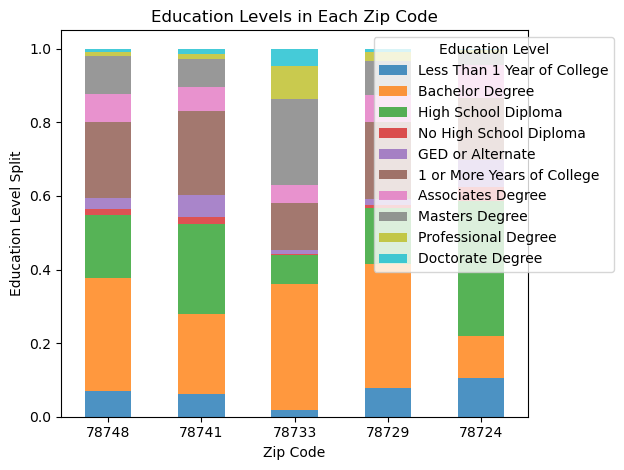

In [38]:
# Education data for each zip code
education_data = {
    "78748": {"Less Than 1 Year of College": 0.0712, "Bachelor Degree": 0.3066, "High School Diploma": 0.1714,
              "No High School Diploma": 0.0158, "GED or Alternate": 0.0301, "1 or More Years of College": 0.2051,
              "Associates Degree": 0.0779, "Masters Degree": 0.1016, "Professional Degree": 0.0109, "Doctorate Degree": 0.0094},
    "78741": {"Less Than 1 Year of College": 0.0622, "Bachelor Degree": 0.2158, "High School Diploma": 0.2457,
              "No High School Diploma": 0.0183, "GED or Alternate": 0.0602, "1 or More Years of College": 0.2273,
              "Associates Degree": 0.0673, "Masters Degree": 0.0764, "Professional Degree": 0.0132, "Doctorate Degree": 0.0132},
    "78733": {"Less Than 1 Year of College": 0.0189, "Bachelor Degree": 0.3431, "High School Diploma": 0.0784,
              "No High School Diploma": 0.0025, "GED or Alternate": 0.0115, "1 or More Years of College": 0.127,
              "Associates Degree": 0.0494, "Masters Degree": 0.2323, "Professional Degree": 0.0904, "Doctorate Degree": 0.0454},
    "78729": {"Less Than 1 Year of College": 0.0773, "Bachelor Degree": 0.3381, "High School Diploma": 0.1521,
              "No High School Diploma": 0.0089, "GED or Alternate": 0.0139, "1 or More Years of College": 0.2093,
              "Associates Degree": 0.0742, "Masters Degree": 0.0933, "Professional Degree": 0.0232, "Doctorate Degree": 0.0094},
    "78724": {"Less Than 1 Year of College": 0.1041, "Bachelor Degree": 0.1152, "High School Diploma": 0.3672,
              "No High School Diploma": 0.037, "GED or Alternate": 0.0736, "1 or More Years of College": 0.1677,
              "Associates Degree": 0.0912, "Masters Degree": 0.0326, "Professional Degree": 0.0082, "Doctorate Degree": 0.0025},
}
# Convert education data into a DataFrame
education_df = pd.DataFrame(education_data).T
# Plot the bar plot of education levels in each zip code
plt.figure(figsize=(10, 6))
education_df.plot(kind='bar', stacked=True, colormap='tab10', alpha=0.8)
plt.xlabel("Zip Code")
plt.ylabel("Education Level Split")
plt.title("Education Levels in Each Zip Code")
plt.legend(title="Education Level", loc="upper right", bbox_to_anchor=(1.2, 1))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


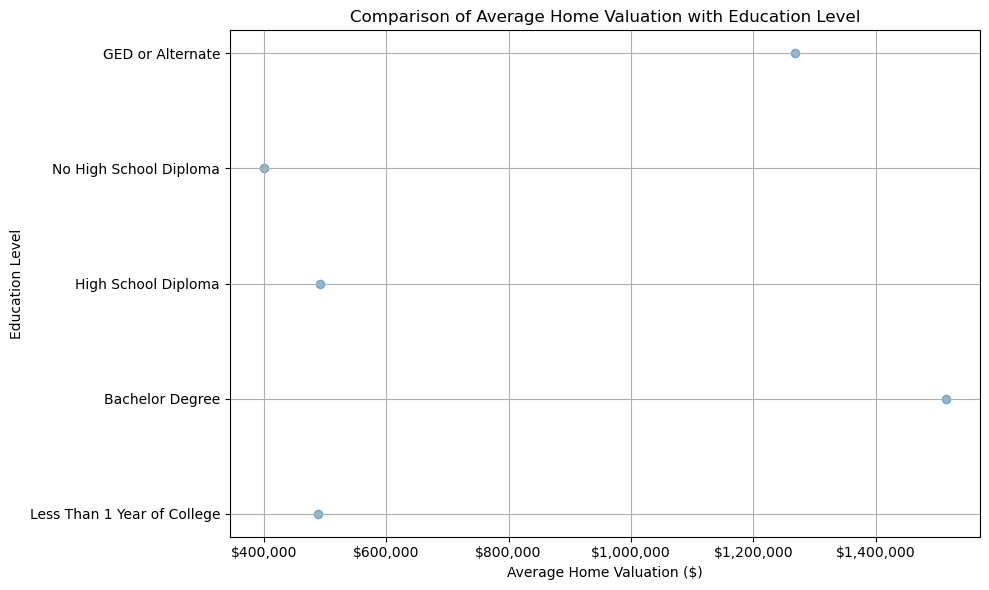

In [39]:
#Compare Education Levels and Avg Home Prices by Zipcode
avg_val_list = [488501.11, 1514635.31, 492670.52, 400305.02, 1267481.61]
zip_codes2 = ["78741", "78729", "78748", "78724", "78733"]
education_levels = ["Less Than 1 Year of College", "Bachelor Degree", "High School Diploma", "No High School Diploma",
                    "GED or Alternate"]
data = {
    "78741": [488501.11],
    "78729": [1514635.31],
    "78748": [492670.52],
    "78724": [400305.02],
    "78733": [1267481.61],
}
# Convert the avg_val_list and education_levels into a DataFrame
avg_val_df = pd.DataFrame({'Education': education_levels, 'Average Home Valuation': avg_val_list})
# Merge the avg_val_df with the merged_education DataFrame using the 'Education' column as the key
merged_df = pd.merge(avg_val_df, merged_education, on='Education')
# Create a scatter plot to compare the average home valuation with other data in the merged DataFrame
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Average Home Valuation'], merged_df['Education'], alpha=0.5)
plt.xlabel("Average Home Valuation ($)")
plt.ylabel("Education Level")
plt.title("Comparison of Average Home Valuation with Education Level")
plt.grid(True)
# Format the y-axis labels to display the education levels
plt.yticks(range(len(education_levels)), education_levels)
# Format the x-axis labels to show the "$" symbol and format the values as thousands
plt.gca().xaxis.set_major_formatter('${:,.0f}'.format)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

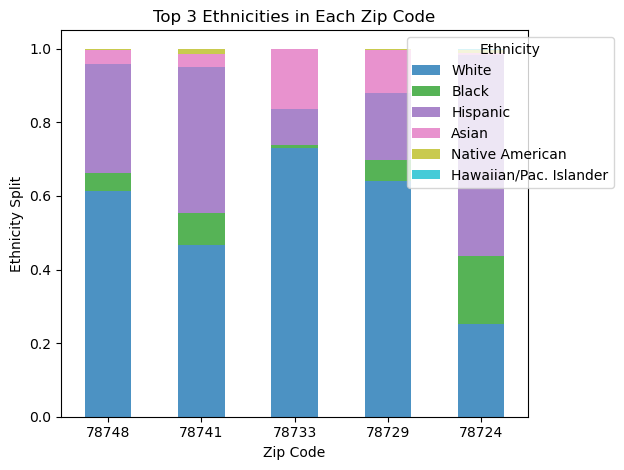

In [40]:
#Visualization 1 - Ethnicity data for each zip code
ethnicity_data = {
    "78748": {"White": 0.6139, "Black": 0.0496, "Hispanic": 0.2951, "Asian": 0.0372, "Native American": 0.0042, "Hawaiian/Pac. Islander": 0},
    "78741": {"White": 0.4664, "Black": 0.0875, "Hispanic": 0.3961, "Asian": 0.0345, "Native American": 0.0143, "Hawaiian/Pac. Islander": 0.0011},
    "78733": {"White": 0.7292, "Black": 0.0105, "Hispanic": 0.0959, "Asian": 0.1644, "Native American": 0, "Hawaiian/Pac. Islander": 0},
    "78729": {"White": 0.6404, "Black": 0.0563, "Hispanic": 0.1838, "Asian": 0.1163, "Native American": 0.0032, "Hawaiian/Pac. Islander": 0},
    "78724": {"White": 0.2512, "Black": 0.1863, "Hispanic": 0.5458, "Asian": 0.0051, "Native American": 0.0088, "Hawaiian/Pac. Islander": 0.0029},}
# Convert ethnicity data into a DataFrame
ethnicity_df = pd.DataFrame(ethnicity_data).T
# Data for Average Home Value
average_home_value_data = {
    "ZipCode": ["78741", "78729", "78748", "78724", "78733"],
    "AverageHomeValue": [488501.11, 1514635.31, 492670.52, 400305.02, 1267481.61],
}
# Convert average home value data into a DataFrame
average_home_value_df = pd.DataFrame(average_home_value_data)
# Plot the bar plot of top 3 ethnicities in each zip code
plt.figure(figsize=(10, 6))
ethnicity_df.plot(kind='bar', stacked=True, colormap='tab10', alpha=0.8)
plt.xlabel("Zip Code")
plt.ylabel("Ethnicity Split")
plt.title("Top 3 Ethnicities in Each Zip Code")
plt.legend(title="Ethnicity", loc="upper right", bbox_to_anchor=(1.2, 1))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

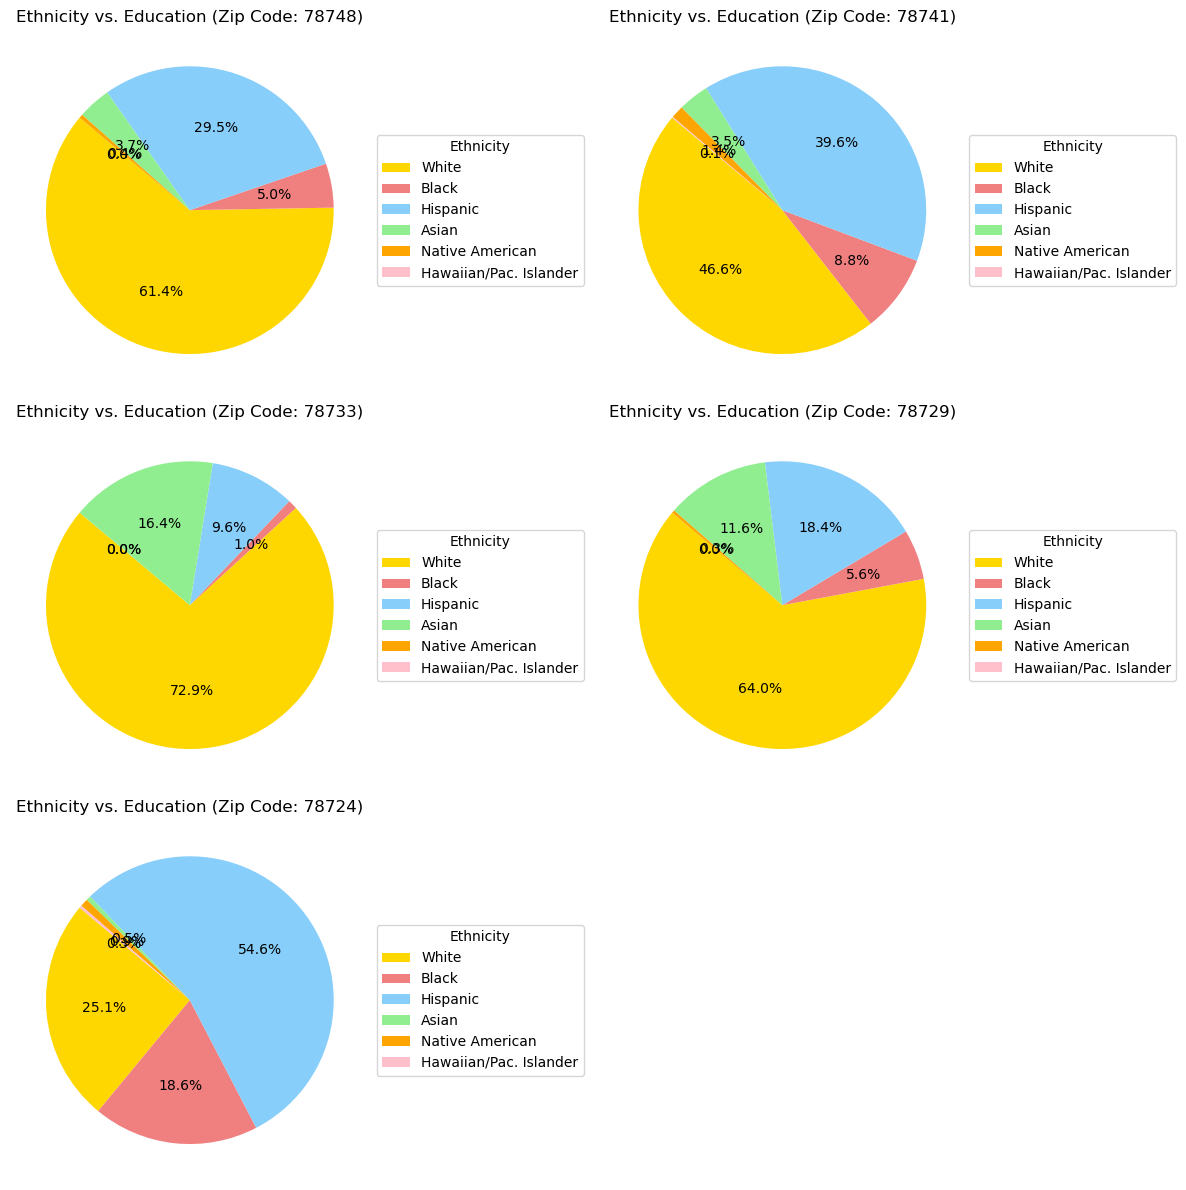

In [41]:
# plt.figure(figsize=(12, 12))
# Create a 3x2 grid of subplots
grid_rows, grid_cols = 3, 2
fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(12, 12))

# Flatten axes to iterate over them in a single loop
axes = axes.flatten()

# Iterate over each zip code and its corresponding ethnicity data
for i, (zip_code, sizes) in enumerate(ethnicity_df.iterrows()):
    labels = sizes.index
    colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen', 'orange', 'pink', 'purple', 'yellow', 'cyan', 'lime']
    # Create the pie chart on the corresponding subplot
    wedges, texts, autotexts = axes[i].pie(sizes, colors=colors, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f"Ethnicity vs. Education (Zip Code: {zip_code})")
    # Add a legend for the wedges (ethnicity categories)
    axes[i].legend(wedges, labels, title="Ethnicity", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    # Equal aspect ratio ensures the pie chart is drawn as a circle.
    axes[i].set_aspect("equal")
    
# Hide empty subplots
for i in range(len(ethnicity_df), grid_rows * grid_cols):
    axes[i].axis("off")
plt.tight_layout()
plt.show()

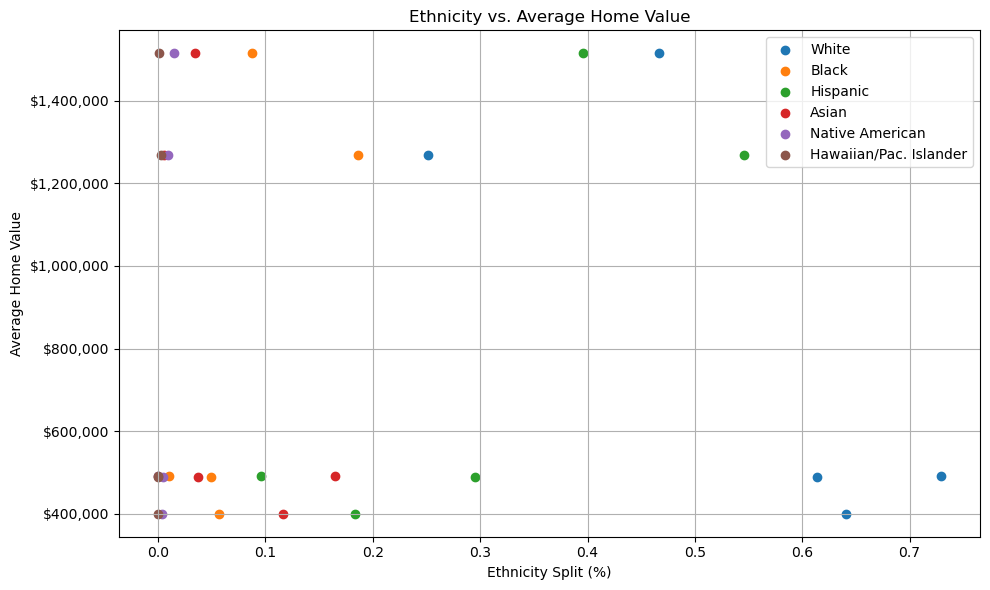

In [42]:
# Data for Ethnicity vs. Average Home Value
average_home_value_data = {
    "ZipCode": ["78741", "78729", "78748", "78724", "78733"],
    "AverageHomeValue": [488501.11, 1514635.31, 492670.52, 400305.02, 1267481.61],
}
# Convert average home value data into a DataFrame
average_home_value_df = pd.DataFrame(average_home_value_data)
# Create a Scatter plot for Ethnicity vs. Average Home Value
plt.figure(figsize=(10, 6))
for ethnicity in ethnicity_df.columns:
    plt.scatter(ethnicity_df[ethnicity], average_home_value_df["AverageHomeValue"], label=ethnicity)
plt.xlabel("Ethnicity Split (%)")
plt.ylabel("Average Home Value")# Format the x-axis labels to show the "$" symbol and format the values as thousands
plt.gca().yaxis.set_major_formatter('${:,.0f}'.format)
plt.title("Ethnicity vs. Average Home Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [43]:
#This section compares the changes in value throughout the year 2022
#clean up the dataFrame
#drop City and State Columns
updated_2022_values = zip_2022_valuations.drop(['State', 'City'], axis=1)
#Set RegionName as Index
updated_2022_values = updated_2022_values.set_index("RegionName")
updated_2022_values = updated_2022_values.loc[:, '1/31/2022':'12/31/2022'].astype(int)
#rename columns
updated_2022_values.rename(columns={'1/31/2022':'Jan',
                                             '2/28/2022': 'Feb',
                                             '3/31/2022': 'March',
                                             '4/30/2022': 'April',
                                             '5/31/2022': 'May',
                                             '6/30/2022': 'June',
                                             '7/31/2022': 'July',
                                             '8/31/2022': 'Aug',
                                             '9/30/2022': 'Sept',
                                             '10/31/2022': 'Oct',
                                             '11/30/2022': 'Nov',
                                             '12/31/2022': 'Dec'
                                            }, inplace=True)
updated_2022_values

,Jan,Feb,March,April,May,June,July,Aug,Sept,Oct,Nov,Dec
RegionName,,,,,,,,,,,,
78748,465286,473347,483320,493419,502753,508616,509386,506232,500848,495532,489846,483455
78741,457103,465829,476951,488725,499506,506264,507912,504129,497817,491751,486446,479575
78729,487645,497172,508555,519211,527941,532875,531905,527052,520167,514145,507955,500996
78724,371641,381806,393216,403622,411331,416540,417392,414100,407958,401591,395709,388749
78733,1178402,1207222,1245478,1283010,1313325,1326954,1324097,1308750,1284460,1261612,1244879,1231585


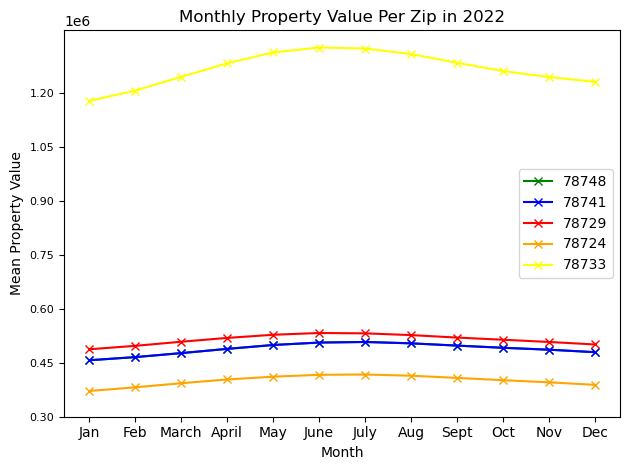

In [44]:

#Create Line Chart-monthly property value per zip Rodneaa
# Create a list of months for x-axis
x = np.array([np.arange(12)]*5).T
#lines = plt.step(x, monthly_household_incomes)
months = ['Jan','Feb','March','April','May','June','July','Aug','Sept','Oct','Nov','Dec']
# Plot Zip 78748
#line_78748,= plt.plot(months, monthly_household_incomes.loc['78748',[months]] , color="green", label='78748')
line_78741 = plt.plot(months,updated_2022_values.loc[78741,['Jan','Feb','March','April','May','June','July','Aug','Sept','Oct','Nov','Dec']]
                      , marker='x', color="green", label='78748')
# Plot Zip 78741
line_78741,=plt.plot(months, updated_2022_values.loc[78741,['Jan','Feb','March','April','May','June','July','Aug','Sept','Oct','Nov','Dec']]
                      , marker='x', color="blue", label='78741')
# Plot Zip 78729
line_78729,=plt.plot(months, updated_2022_values.loc[78729,['Jan','Feb','March','April','May','June','July','Aug','Sept','Oct','Nov','Dec']]
                      , marker='x', color="red", label='78729')
# Plot Zip 78724
line_78724,=plt.plot(months, updated_2022_values.loc[78724,['Jan','Feb','March','April','May','June','July','Aug','Sept','Oct','Nov','Dec']]
                      , marker='x', color="orange", label='78724')
# Plot Zip 78733
line_78733,=plt.plot(months, updated_2022_values.loc[78733,['Jan','Feb','March','April','May','June','July','Aug','Sept','Oct','Nov','Dec']]
                     , marker='x', color="yellow", label='78733')
plt.legend(loc="best")
plt.title("Monthly Property Value Per Zip in 2022")
plt.xlabel("Month")
plt.ylabel("Mean Property Value")
#plt.ylim(350000, 1400000)
plt.yticks(range(300000, 1350000, 150000), fontsize=8)
plt.tight_layout()
#fig,ax = plt.subplots(figsize=(10,6))
#ax.plot(1500000*np.random.rand(30000))
plt.show()